In [1]:
!pip3 install numpy pandas matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
enhanced_amcl_pd = pd.read_csv("u_enhanced_amcl_test_result.csv", delimiter=',')
normal_amcl_pd   = pd.read_csv("u_normal_amcl_test_result.csv", delimiter=',')

In [4]:
enhanced_amcl_pd.head()

,sample_time,current_x,current_y,current_angle,target_x,target_y,target_index
0,1.610441e+09,5.454322,10.973804,3.040463,5.448889,10.943335,0.0
1,1.610441e+09,4.045410,10.964450,3.075645,4.032756,10.951140,1.0
2,1.610441e+09,2.501149,10.981792,-3.096638,2.460622,10.946963,2.0
3,1.610441e+09,0.928941,9.844659,-1.796222,0.953635,9.726873,3.0
4,1.610441e+09,0.974579,8.291337,-1.657429,0.919482,8.368681,4.0


In [5]:
normal_amcl_pd.head()

,sample_time,current_x,current_y,current_angle,target_x,target_y,target_index
0,1.610438e+09,5.436510,10.971248,3.059475,5.448889,10.943335,0.0
1,1.610438e+09,3.999186,11.034270,-3.063696,4.032756,10.951140,1.0
2,1.610438e+09,2.584423,11.036724,3.088811,2.460622,10.946963,2.0
3,1.610438e+09,1.008250,9.982539,-1.683899,0.953635,9.726873,3.0
4,1.610438e+09,0.943253,8.539386,-1.696362,0.919482,8.368681,4.0


<t><b>Normal AMCL result</b><t>

<AxesSubplot:title={'center':'current_angle'}, xlabel='target_index'>

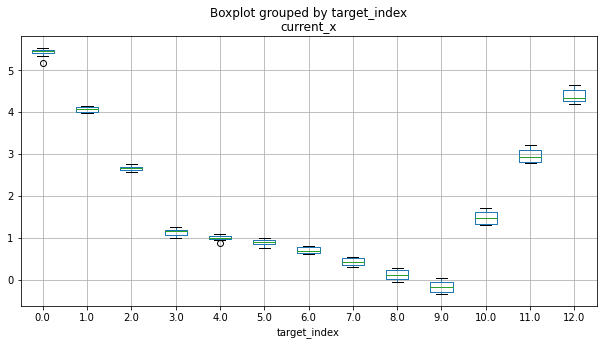

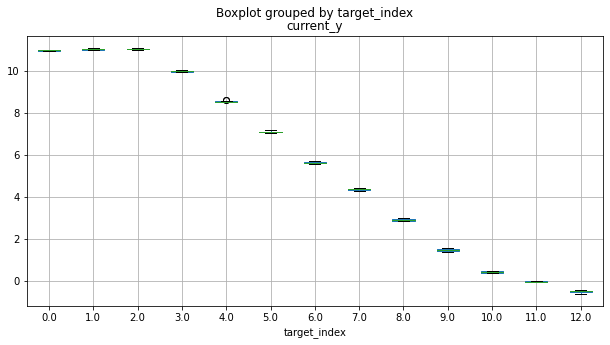

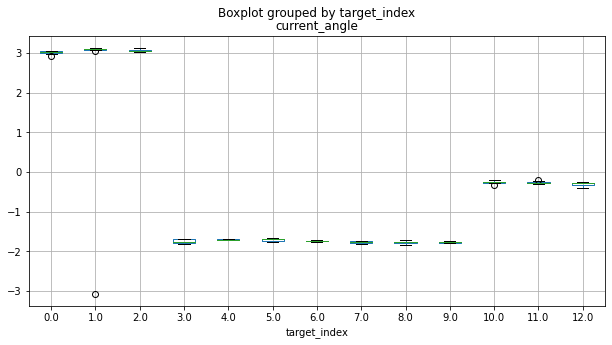

In [6]:
normal_amcl_pd.boxplot(by ='target_index', column =['current_x'], figsize=(10, 5), grid = True) 
normal_amcl_pd.boxplot(by ='target_index', column =['current_y'], figsize=(10, 5), grid = True) 
normal_amcl_pd.boxplot(by ='target_index', column =['current_angle'], figsize=(10, 5), grid = True) 

In [7]:
normal_amcl_pd.groupby('target_index').agg({
                "current_x": ["mean", "median", "std"],
                "current_y": ["mean", "median", "std"],
})

current_x                      current_y                     
                  mean    median       std       mean     median       std
target_index                                                              
0.0           5.425769  5.462819  0.113144  10.970664  10.971307  0.022076
1.0           4.074444  4.091895  0.067744  11.020464  11.016054  0.030274
2.0           2.664439  2.674783  0.061840  11.033280  11.031706  0.032379
3.0           1.136146  1.157962  0.091908   9.981319   9.975604  0.033651
4.0           1.004895  1.006068  0.071423   8.549994   8.535965  0.046439
5.0           0.900216  0.911249  0.081412   7.090237   7.083205  0.041101
6.0           0.711938  0.686839  0.084361   5.617232   5.609621  0.041936
7.0           0.437622  0.429863  0.094149   4.354066   4.362457  0.046737
8.0           0.123362  0.108274  0.125969   2.908990   2.905409  0.058688
9.0          -0.162545 -0.179926  0.146892   1.466910   1.468649  0.067243
10.0          1.502007  1.485930  0.169408   0.408973   0.402373  0.038828
11.0          2.970219  2.940538  0.164718  -0.036155  -0.035769  0.026698
12.0          4.408540  4.354868  0.168144  -0.510094  -0.492439  0.057641

In [8]:
normal_amcl_pd['dist'] = ((normal_amcl_pd['current_x'] - normal_amcl_pd['target_x'])**2 + \
                         (normal_amcl_pd['current_y'] - normal_amcl_pd['target_y'])**2).apply(np.sqrt)
normal_amcl_pd.groupby('target_index')['dist'].describe()

,count,mean,std,min,25%,50%,75%,max
target_index,,,,,,,,
0.0,8.0,0.086459,0.078805,0.020735,0.031306,0.071008,0.093004,0.263483
1.0,9.0,0.104962,0.021753,0.076548,0.089652,0.103766,0.118949,0.133566
2.0,8.0,0.225112,0.054302,0.152917,0.189147,0.221851,0.258554,0.313698
3.0,8.0,0.322039,0.055815,0.258700,0.277673,0.308078,0.380892,0.391291
4.0,8.0,0.212656,0.038509,0.164292,0.182883,0.207755,0.245613,0.265144
5.0,8.0,0.423539,0.045780,0.355988,0.395802,0.421931,0.440193,0.505876
6.0,8.0,0.474339,0.069063,0.381605,0.426740,0.460283,0.526214,0.566639
7.0,8.0,0.716560,0.086609,0.598689,0.651000,0.711112,0.804439,0.808500
8.0,8.0,0.860058,0.117508,0.710431,0.764686,0.854165,0.977902,0.987150


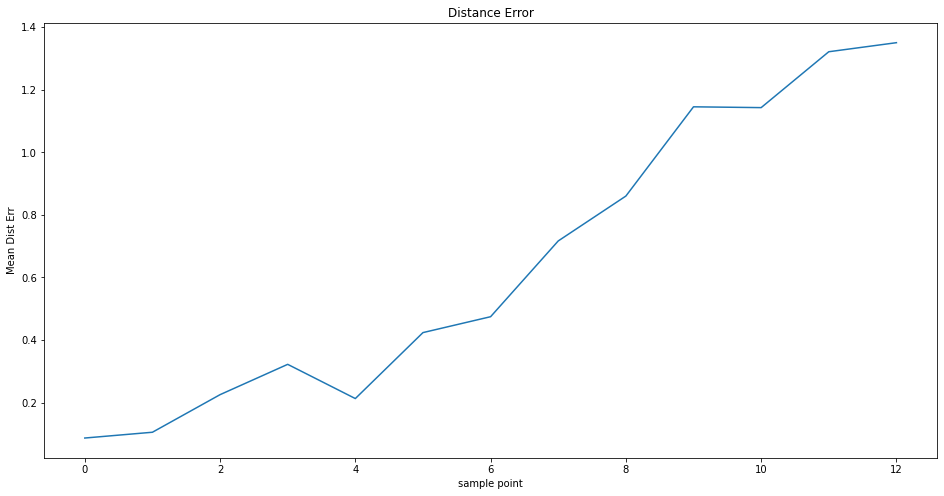

In [9]:
normal_amcl_pd['dist_mean'] = normal_amcl_pd.groupby('target_index')['dist'].mean()
normal_amcl_pd['target_index_unique'] = normal_amcl_pd.groupby('target_index')['target_index'].unique()
plt.figure(figsize=(16,8))
plt.plot(normal_amcl_pd['target_index_unique'], normal_amcl_pd['dist_mean'])
plt.title('Distance Error')
plt.xlabel('sample point')
plt.ylabel('Mean Dist Err')
plt.show()

/home/ndhuu/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


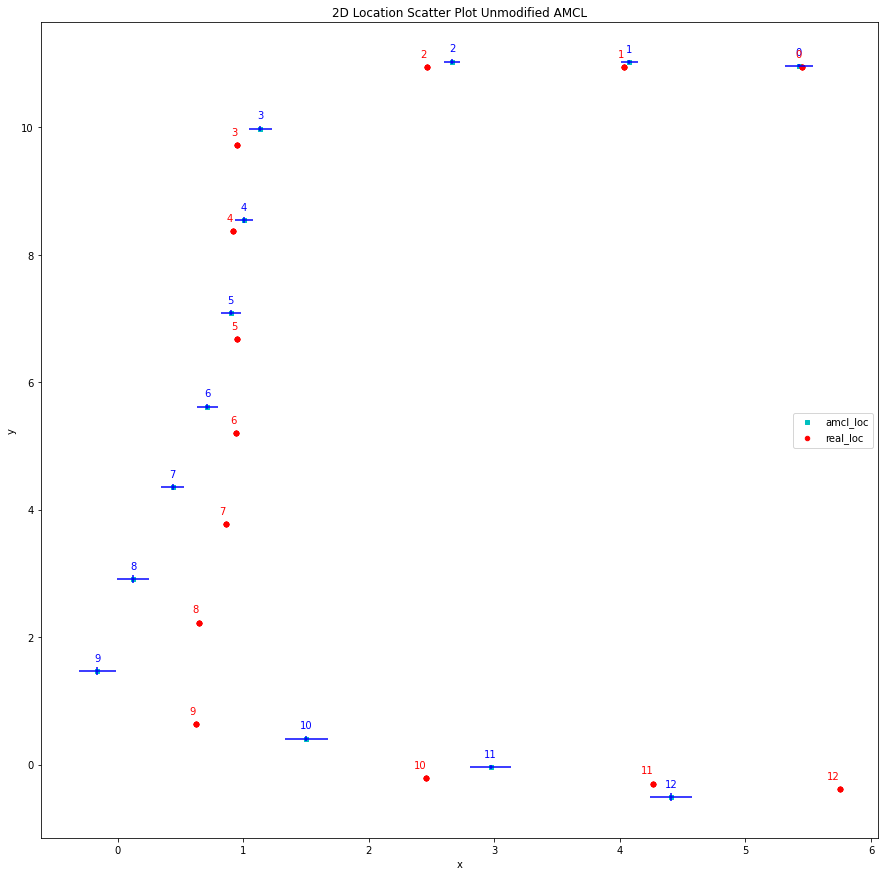

In [10]:
normal_amcl_pd['current_x_mean'] = normal_amcl_pd.groupby('target_index')['current_x'].mean()
normal_amcl_pd['current_y_mean'] = normal_amcl_pd.groupby('target_index')['current_y'].mean()
normal_amcl_pd['current_x_std'] = normal_amcl_pd.groupby('target_index')['current_x'].std()
normal_amcl_pd['current_y_std'] = normal_amcl_pd.groupby('target_index')['current_y'].std()
normal_amcl_pd['target_index_unique'] = normal_amcl_pd.groupby('target_index')['target_index'].unique()
normal_fig = plt.figure(figsize=(15, 15))
ax1 = normal_fig.add_subplot(111)

ax1.scatter(normal_amcl_pd['current_x_mean'], normal_amcl_pd['current_y_mean'], s=10, c='c', marker="s", label='amcl_loc')
ax1.scatter(normal_amcl_pd['target_x'], normal_amcl_pd['target_y'], s=20, c='r', marker="o", label='real_loc')
plt.legend(loc='center right');
for idx, x,y, xerr,yerr in zip(normal_amcl_pd['target_index_unique'],
                               normal_amcl_pd['current_x_mean'],
                               normal_amcl_pd['current_y_mean'],
                               normal_amcl_pd['current_x_std'],
                               normal_amcl_pd['current_y_std']):
    label = "{:.0f}".format(float(idx))
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', color='b')
    plt.errorbar(x, y, yerr, xerr, solid_capstyle='projecting', color='b')
for idx, x,y in zip(normal_amcl_pd['target_index_unique'],
                    normal_amcl_pd['target_x'].unique(),
                    normal_amcl_pd['target_y'].unique()):
    label = "{:.0f}".format(float(idx))
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='right', color='r')
plt.title('2D Location Scatter Plot Unmodified AMCL')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


<t><b>Enhanced AMCL result</b><t>

image: maptest1.pgm
resolution: 0.025000
origin: [-11.400000, -19.400000, 0.000000]
negate: 0
occupied_thresh: 0.65
free_thresh: 0.196

<AxesSubplot:title={'center':'current_angle'}, xlabel='target_index'>

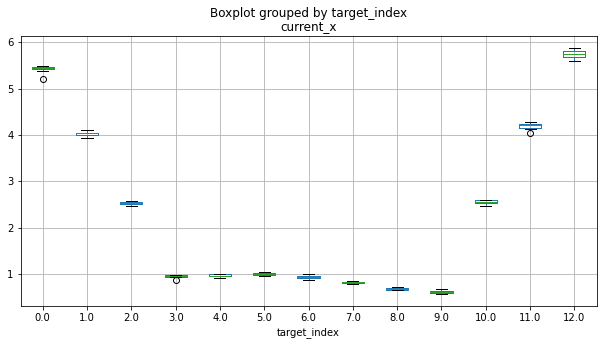

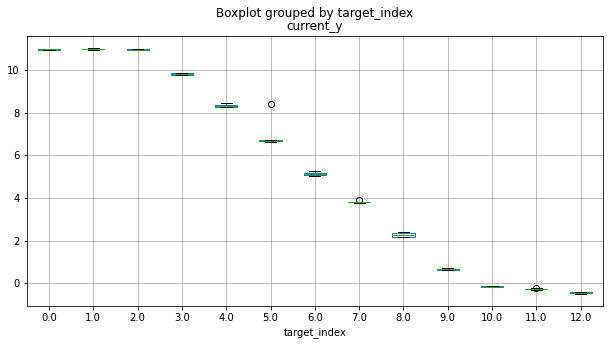

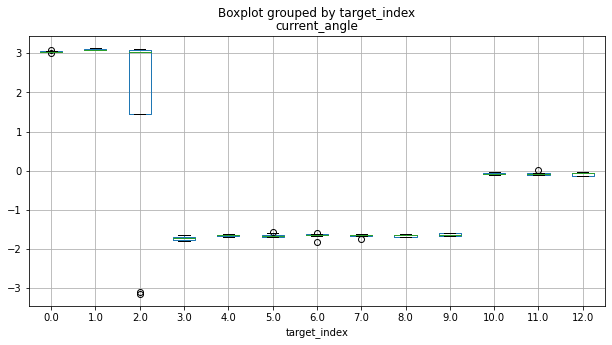

In [11]:
enhanced_amcl_pd.boxplot(by ='target_index', column =['current_x'], figsize=(10, 5), grid = True) 
enhanced_amcl_pd.boxplot(by ='target_index', column =['current_y'], figsize=(10, 5), grid = True) 
enhanced_amcl_pd.boxplot(by ='target_index', column =['current_angle'], figsize=(10, 5), grid = True) 

In [12]:
enhanced_amcl_pd.groupby('target_index').agg({
                "current_x": ["mean", "median", "std"],
                "current_y": ["mean", "median", "std"],
})

current_x                      current_y                     
                  mean    median       std       mean     median       std
target_index                                                              
0.0           5.421532  5.447428  0.090223  10.975598  10.969940  0.022289
1.0           4.026684  4.046819  0.055517  10.988199  10.998998  0.034545
2.0           2.532556  2.537031  0.039293  10.961045  10.966513  0.025909
3.0           0.950738  0.957771  0.032915   9.814199   9.825207  0.042749
4.0           0.966975  0.968561  0.030556   8.335738   8.321221  0.061729
5.0           0.997665  0.998095  0.031360   6.870043   6.670870  0.573792
6.0           0.935877  0.939747  0.041763   5.128860   5.140442  0.084048
7.0           0.825422  0.827852  0.022357   3.804877   3.791558  0.042998
8.0           0.685069  0.686110  0.027215   2.269371   2.276852  0.085120
9.0           0.624137  0.606537  0.041767   0.657173   0.651730  0.024612
10.0          2.553131  2.553059  0.041711  -0.162265  -0.155314  0.019737
11.0          4.191796  4.220346  0.070555  -0.262866  -0.269637  0.029286
12.0          5.746271  5.742922  0.099367  -0.451610  -0.447413  0.029002

In [13]:
enhanced_amcl_pd['dist'] = ((enhanced_amcl_pd['current_x'] - enhanced_amcl_pd['target_x'])**2 + \
                         (enhanced_amcl_pd['current_y'] - enhanced_amcl_pd['target_y'])**2).apply(np.sqrt)
enhanced_amcl_pd.groupby('target_index')['dist'].describe()

,count,mean,std,min,25%,50%,75%,max
target_index,,,,,,,,
0.0,8.0,0.072968,0.067801,0.024228,0.030351,0.050554,0.082326,0.230255
1.0,8.0,0.064759,0.033080,0.018365,0.048716,0.064749,0.083177,0.109368
2.0,8.0,0.078092,0.037229,0.012755,0.052034,0.087104,0.103553,0.123368
3.0,8.0,0.093331,0.040996,0.021245,0.081404,0.103604,0.118523,0.142918
4.0,8.0,0.082325,0.028576,0.025854,0.077542,0.088685,0.094710,0.122418
5.0,9.0,0.241083,0.555914,0.007832,0.022125,0.078985,0.098293,1.720414
6.0,8.0,0.099829,0.068065,0.033091,0.044940,0.083907,0.128344,0.203807
7.0,8.0,0.057090,0.029539,0.020303,0.038101,0.054068,0.071893,0.112498
8.0,10.0,0.095327,0.039669,0.057747,0.069972,0.077557,0.117008,0.169113


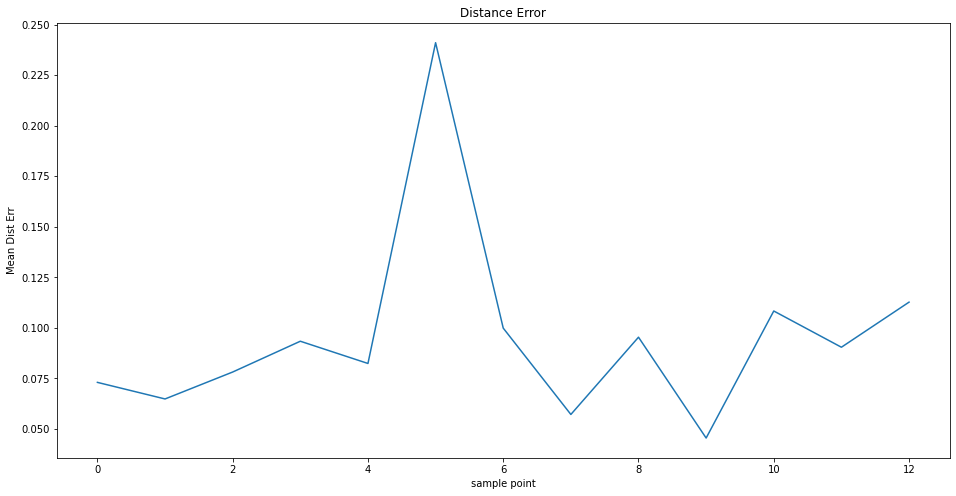

In [14]:
enhanced_amcl_pd['dist_mean'] = enhanced_amcl_pd.groupby('target_index')['dist'].mean()
enhanced_amcl_pd['target_index_unique'] = enhanced_amcl_pd.groupby('target_index')['target_index'].unique()
plt.figure(figsize=(16,8))
plt.plot(enhanced_amcl_pd['target_index_unique'], enhanced_amcl_pd['dist_mean'])
plt.title('Distance Error')
plt.xlabel('sample point')
plt.ylabel('Mean Dist Err')
plt.show()

/home/ndhuu/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


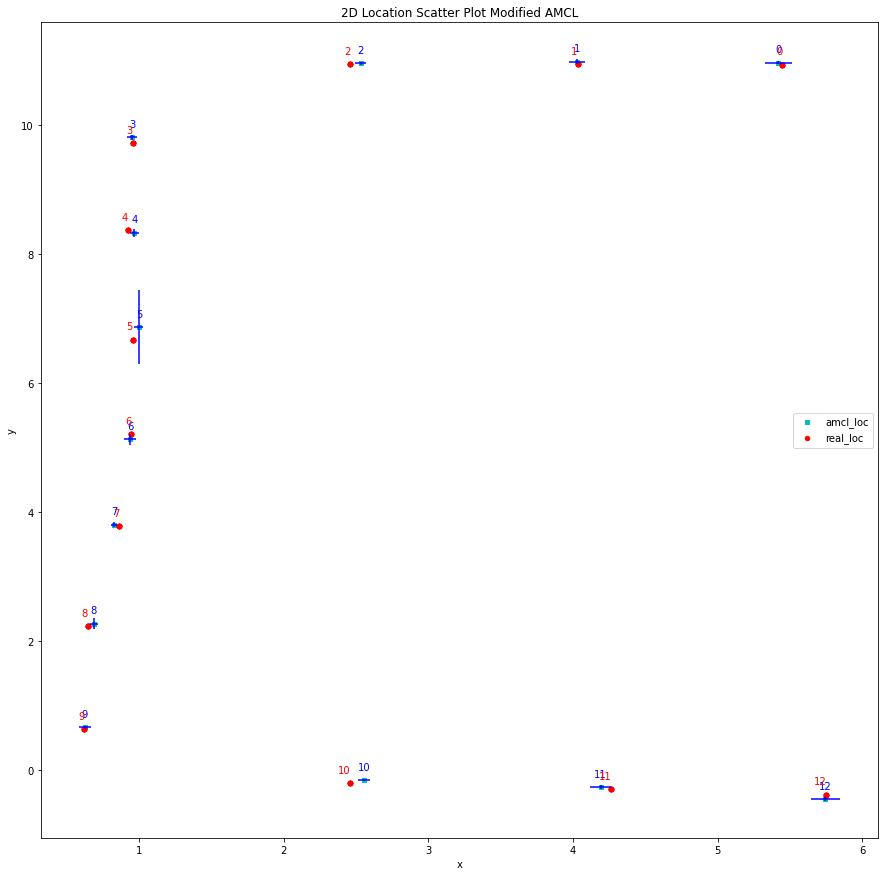

In [15]:
enhanced_amcl_pd['current_x_mean'] = enhanced_amcl_pd.groupby('target_index')['current_x'].mean()
enhanced_amcl_pd['current_y_mean'] = enhanced_amcl_pd.groupby('target_index')['current_y'].mean()
enhanced_amcl_pd['current_x_std'] = enhanced_amcl_pd.groupby('target_index')['current_x'].std()
enhanced_amcl_pd['current_y_std'] = enhanced_amcl_pd.groupby('target_index')['current_y'].std()
enhanced_amcl_pd['target_index_unique'] = enhanced_amcl_pd.groupby('target_index')['target_index'].unique()
enhanced_fig = plt.figure(figsize=(15, 15))
ax1 = enhanced_fig.add_subplot(111)

ax1.scatter(enhanced_amcl_pd['current_x_mean'], enhanced_amcl_pd['current_y_mean'], s=10, c='c', marker="s", label='amcl_loc')
ax1.scatter(enhanced_amcl_pd['target_x'], enhanced_amcl_pd['target_y'], s=20, c='r', marker="o", label='real_loc')
plt.legend(loc='center right');
for idx, x,y, xerr,yerr in zip(enhanced_amcl_pd['target_index_unique'],
                               enhanced_amcl_pd['current_x_mean'],
                               enhanced_amcl_pd['current_y_mean'],
                               enhanced_amcl_pd['current_x_std'],
                               enhanced_amcl_pd['current_y_std']):
    label = "{:.0f}".format(float(idx))
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', color='b')
    plt.errorbar(x, y, yerr, xerr, solid_capstyle='projecting', color='b')
for idx, x,y in zip(enhanced_amcl_pd['target_index_unique'],
                    enhanced_amcl_pd['target_x'].unique(),
                    enhanced_amcl_pd['target_y'].unique()):
    label = "{:.0f}".format(float(idx))
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='right', color='r')
plt.title('2D Location Scatter Plot Modified AMCL')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [16]:
enhanced_amcl_raw_pd = pd.read_csv("enhanced_amcl_test_result.csv", delimiter=',')
normal_amcl_raw_pd   = pd.read_csv("normal_amcl_test_result.csv", delimiter=',')
enhanced_amcl_raw_pd_timing = pd.read_csv("enhanced_retiming.csv", delimiter=',')


Modified AMCL: mean: 0.160470453898112 std: 0.10704137972036142
(15,)


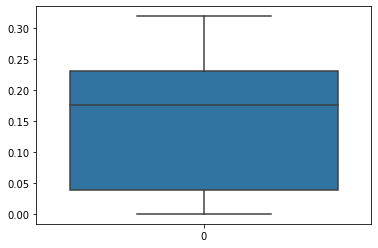

In [17]:
curr_target = -1
time_diff = []
for idx, data in enhanced_amcl_raw_pd_timing.iterrows():
    if (int(data['target_index']) != curr_target):
        if (data['time'] - data['sample_time'] < 4):
            time_diff.append(data['time'] - data['sample_time'])
        curr_target = int(data['target_index'])
time_diff = np.asarray(time_diff)
print("Modified AMCL: mean:", np.mean(time_diff), "std:", np.std(time_diff))
sns.boxplot(data=time_diff)
print(time_diff.shape)